In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a matrix, mask and noise
p = 0.75
rank = 1

n = 4

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

In [3]:
def minimize_singular_value(sing_val_index):

    starting_point = np.copy(original)

    boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
    starting_point[boolMask] = 0

    prev_norm = np.linalg.norm(starting_point,'nuc')

    current_point = starting_point

    def obj_func(m, vec):
        u, s, vh = np.linalg.svd(m)
        index = np.argmax(np.dot(vec, u))

        return s[index]

    def comp_grad(of, m, vec):
        """ Computes gradient that maximizes the objective function """
        epsilon = 1e-3

        grad = np.zeros([n,n])

        for i in range(n):
            for j in range(n):
                if boolMask[i,j]:
                    diff = np.zeros([n,n])
                    diff[i,j] = epsilon
                    grad[i,j] = (of(m + diff, vec) - of(m - diff, vec))/(2*epsilon)

        return grad


    u, s, vh = np.linalg.svd(current_point)
    vec = u[:,sing_val_index]

    sing_val_log = []
    distances_log = []
    
    for i in range(2000):
        u, s, vh = np.linalg.svd(current_point)
        index = np.argmax(np.dot(vec, u))
        vec = u[:,index]

        print(i, index, s[index], np.linalg.norm(current_point-original,'fro'))
        sing_val_log.append(s[index])
        distances_log.append(np.linalg.norm(current_point-original,'fro'))
        current_point = current_point - 0.1*comp_grad(obj_func, current_point, vec)
    
    return current_point, sing_val_log, distances_log

In [4]:
result, sing_val_log, distances_log = minimize_singular_value(2)

0 2 0.10548917462528726 1.6396927490974071
1 2 0.13425582449673418 9.85302510481801
2 2 0.13169609771799362 9.85236101621754
3 2 0.12965977212156068 9.85163253524454
4 2 0.12802303712434335 9.850841334302984
5 2 0.12668337638807284 9.849990946009477
6 2 0.1255595338104113 9.8490859760158
7 2 0.1245891727866592 9.848131496321292
8 2 0.12372561063176395 9.84713262395613
9 2 0.12293449911064637 9.846094256035979
10 2 0.12219088723025016 9.84502092209503
11 2 0.12147681739207772 9.843916717320422
12 2 0.12077945162497877 9.84278528782619
13 2 0.12008965713887393 9.841629847091326
14 2 0.1194009616482548 9.840453209383556
15 2 0.11870879341728854 9.839257831003067
16 2 0.11800993434782787 9.838045853688376
17 2 0.11730212945147547 9.836819146873077
18 2 0.11658380961373725 9.835579346998191
19 2 0.11585389567520854 9.834327893034736
20 2 0.1151116604892148 9.8330660579469
21 2 0.11435663210716432 9.831794976160369
22 2 0.1135885260228663 9.830515667282292
23 2 0.11280719787791915 9.82922905

258 1 2.3433825135351527 493.0093769406795
259 1 2.3377465367216534 493.00931461542126
260 1 2.3324364687934285 493.0092552465963
261 1 2.32742467246814 493.0091986289054
262 1 2.32268648351589 493.0091445757332
263 1 2.3181998357206277 493.0090929171197
264 1 2.3139449381412294 493.0090434979785
265 1 2.3099039970325883 493.0089961765509
266 1 2.3060609758799457 493.0089508230074
267 1 2.302401387959542 493.00890731823154
268 1 2.2989121166718873 493.0088655527545
269 1 2.295581259604726 493.00882542579086
270 1 2.2923979929061993 493.00878684440517
271 1 2.2893524530569627 493.0087497227619
272 1 2.286435633583938 493.0087139814537
273 1 2.283639294614293 493.0086795469083
274 1 2.280955883498286 493.0086463508684
275 1 2.2783784649901886 493.00861432991593
276 1 2.2759006596897398 493.0085834250374
277 1 2.273516589655873 493.00855358126074
278 1 2.271220830241368 493.0085247473075
279 1 2.269008367353494 493.00849687527375
280 1 2.2668745594407675 493.00846992037356
281 1 2.2648151

452 1 2.1717858001879 493.00762253657393
453 1 2.1716252223761776 493.00762420153603
454 1 2.171465938161135 493.0076258893857
455 1 2.17130793319755 493.0076275998068
456 1 2.171151193371007 493.0076293324682
457 1 2.1709957047915465 493.00763108706656
458 1 2.1708414537914886 493.0076328632852
459 1 2.170688426918418 493.0076346608309
460 1 2.170536610931985 493.00763647939175
461 1 2.170385992800046 493.0076383186731
462 1 2.1702365596932247 493.007640178383
463 1 2.170088298981702 493.0076420582257
464 1 2.169941198230694 493.00764395792197
465 1 2.169795245196721 493.007645877182
466 1 2.169650427824315 493.00764781573355
467 1 2.169506734241354 493.0076497732984
468 1 2.1693641527558327 493.0076517496026
469 1 2.1692226718528875 493.00765374438146
470 1 2.169082280190152 493.0076557573606
471 1 2.1689429665958033 493.0076577882885
472 1 2.1688047200638794 493.0076598369016
473 1 2.1686675297520583 493.0076619029499
474 1 2.1685313849782752 493.00766398616486
475 1 2.1683962752170

667 1 2.1542289060815176 493.00819068965006
668 1 2.1541933085455804 493.0081933977952
669 1 2.1541579580502392 493.00819610119555
670 1 2.1541228530971734 493.008198799805
671 1 2.1540879921972005 493.0082014935789
672 1 2.154053373870692 493.0082041824749
673 1 2.154018996647264 493.0082068664485
674 1 2.153984859065568 493.0082095454572
675 1 2.1539509596734514 493.0082122194563
676 1 2.1539172970276663 493.00821488840415
677 1 2.1538838696936287 493.00821755226
678 1 2.1538506762457583 493.0082202109763
679 1 2.153817715267262 493.0082228645182
680 1 2.1537849853497923 493.0082255128397
681 1 2.1537524850933885 493.0082281559034
682 1 2.1537202131066904 493.0082307936681
683 1 2.153688168006596 493.00823342609164
684 1 2.1536563484184534 493.00823605313553
685 1 2.1536247529756647 493.00823867476356
686 1 2.153593380319602 493.0082412909351
687 1 2.153562229099917 493.00824390161233
688 1 2.1535312979739976 493.00824650675366
689 1 2.1535005856072402 493.00824910632264
690 1 2.1534

890 1 2.150346039478642 493.0086286604981
891 1 2.1503398916139242 493.0086297849055
892 1 2.1503337972229946 493.0086309020228
893 1 2.150327755865581 493.00863201186615
894 1 2.1503217671042965 493.00863311444704
895 1 2.1503158305045535 493.0086342097772
896 1 2.1503099456346053 493.008635297873
897 1 2.1503041120654203 493.00863637874585
898 1 2.150298329370838 493.00863745241014
899 1 2.1502925971275193 493.0086385188833
900 1 2.1502869149147594 493.00863957817575
901 1 2.150281282314662 493.00864063030264
902 1 2.1502756989121523 493.00864167528044
903 1 2.1502701642948456 493.0086427131219
904 1 2.150264678053009 493.0086437438407
905 1 2.150259239779769 493.00864476745295
906 1 2.150253849070909 493.0086457839739
907 1 2.150248505524805 493.0086467934158
908 1 2.1502432087426637 493.008647795797
909 1 2.1502379583283187 493.0086487911309
910 1 2.150232753888256 493.00864977943314
911 1 2.150227595031585 493.00865076071665
912 1 2.1502224813701467 493.0086517349998
913 1 2.15021

1096 1 2.149751608126868 493.0087309377946
1097 1 2.1497504695459972 493.0087309330748
1098 1 2.1497493382615462 493.0087309247909
1099 1 2.1497482141946964 493.0087309129608
1100 1 2.149747097267573 493.00873089759676
1101 1 2.1497459874029348 493.00873087871935
1102 1 2.1497448845243614 493.00873085634436
1103 1 2.1497437885561452 493.00873083048793
1104 1 2.1497426994234714 493.00873080116725
1105 1 2.1497416170520576 493.00873076839764
1106 1 2.149740541368653 493.0087307321969
1107 1 2.1497394723004914 493.0087306925815
1108 1 2.1497384097757575 493.0087306495655
1109 1 2.1497373537231215 493.00873060316866
1110 1 2.1497363040722433 493.00873055340384
1111 1 2.1497352607532565 493.0087305002869
1112 1 2.149734223697136 493.0087304438375
1113 1 2.1497331928355026 493.0087303840687
1114 1 2.149732168100784 493.0087303209989
1115 1 2.1497311494258846 493.0087302546427
1116 1 2.1497301367446418 493.00873018501767
1117 1 2.149729129991349 493.0087301121365
1118 1 2.149728129101101 493.

1315 1 2.1495921188900704 493.00866895376424
1316 1 2.1495915767502485 493.00866847994143
1317 1 2.149591035190763 493.00866800502286
1318 1 2.1495904942046353 493.0086675290131
1319 1 2.1495899537849543 493.00866705191953
1320 1 2.149589413924987 493.0086665737482
1321 1 2.149588874617995 493.0086660945038
1322 1 2.1495883358573407 493.0086656141941
1323 1 2.149587797636439 493.0086651328248
1324 1 2.1495872599488743 493.00866465040207
1325 1 2.1495867227881935 493.008664166933
1326 1 2.149586186148088 493.00866368242083
1327 1 2.149585650022298 493.00866319687356
1328 1 2.1495851144046685 493.00866271029804
1329 1 2.149584579289027 493.00866222269997
1330 1 2.149584044669398 493.0086617340849
1331 1 2.149583510539778 493.00866124445855
1332 1 2.1495829768942976 493.0086607538269
1333 1 2.1495824437271374 493.0086602621953
1334 1 2.1495819110325187 493.0086597695712
1335 1 2.149581378804764 493.00865927595805
1336 1 2.14958084703828 493.008658781363
1337 1 2.1495803157274254 493.00865

1541 1 2.149476724408521 493.0085430970053
1542 1 2.149476227064911 493.0085424864959
1543 1 2.149475729756873 493.00854187570303
1544 1 2.149475232483972 493.0085412646306
1545 1 2.149474735245648 493.00854065328195
1546 1 2.149474238041595 493.0085400416563
1547 1 2.1494737408712776 493.00853942975453
1548 1 2.1494732437343433 493.0085388175824
1549 1 2.1494727466303316 493.00853820513765
1550 1 2.149472249558795 493.00853759242443
1551 1 2.1494717525194096 493.0085369794434
1552 1 2.149471255511695 493.0085363661931
1553 1 2.1494707585353003 493.0085357526815
1554 1 2.1494702615897325 493.0085351389058
1555 1 2.149469764674731 493.00853452486956
1556 1 2.149469267789825 493.00853391057376
1557 1 2.1494687709346927 493.0085332960181
1558 1 2.1494682741088442 493.0085326812064
1559 1 2.1494677773120388 493.0085320661379
1560 1 2.1494672805438513 493.00853145081754
1561 1 2.1494667838038666 493.00853083524555
1562 1 2.149466287091837 493.0085302194232
1563 1 2.14946579040733 493.008529

1832 1 2.149332586323434 493.00835832729774
1833 1 2.1493320915939855 493.00835767864703
1834 1 2.149331596864621 493.0083570299512
1835 1 2.1493311021353483 493.008356381208
1836 1 2.1493306074061715 493.0083557324208
1837 1 2.1493301126770223 493.00835508358875
1838 1 2.1493296179479446 493.00835443470913
1839 1 2.1493291232189122 493.00835378578444
1840 1 2.149328628489902 493.0083531368145
1841 1 2.149328133760888 493.00835248779975
1842 1 2.1493276390318745 493.0083518387419
1843 1 2.149327144302863 493.0083511896401
1844 1 2.1493266495738665 493.00835054049463
1845 1 2.149326154844812 493.00834989130436
1846 1 2.1493256601157116 493.00834924207
1847 1 2.149325165386566 493.00834859279365
1848 1 2.1493246706573816 493.00834794347435
1849 1 2.1493241759280908 493.0083472941134
1850 1 2.1493236811987666 493.0083466447088
1851 1 2.14932318646936 493.00834599526377
1852 1 2.1493226917398216 493.0083453457769
1853 1 2.1493221970101812 493.0083446962486
1854 1 2.14932170228041 493.00834

### A bit of mess

In [5]:
starting_point = np.copy(original)

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
starting_point[boolMask] = 0

prev_norm = np.linalg.norm(starting_point,'nuc')

current_point = starting_point

def obj_func(m, vec):
    u, s, vh = np.linalg.svd(m)
    index = np.argmax(np.dot(vec, u))

    return s[index]

def comp_grad(of, m, vec):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3

    grad = np.zeros([n,n])

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad[i,j] = (of(m + diff, vec) - of(m - diff, vec))/(2*epsilon)

    return grad

def line_search(point, grad, obj_func, vec, s = 0.01, threshold = 1e-10):
    """ Finds a maximum step size that maximizes the descent (since computing gradient is hard) """

    choice = point - grad * s
    while obj_func(choice, vec) > obj_func(point, vec):
        s = s / 2
        choice = point - grad * s

    initial_s = s

    while True:
        left = choice + grad * s/2
        right = point - grad * s/2

        s = s / 2
        if obj_func(left, vec) < obj_func(right, vec):
            choice = left
        else:
            choice = right

        if np.abs(obj_func(left,vec) - obj_func(right, vec)) < threshold:
            break

    return choice

sing_val_log = []
distances_log = []

for sing_val_index in range(3,0,-1):

    print("\n")
    print("##################")
    print("Optimizing", sing_val_index)
    print("##################")
    print("\n")
    
    u, s, vh = np.linalg.svd(current_point)
    vec = u[:,sing_val_index]

    i = 0
    while obj_func(current_point, vec) > 0.08:
        i = i + 1
        u, s, vh = np.linalg.svd(current_point)
        index = np.argmax(np.dot(vec, u))
        vec = u[:,index]

        print(i, index, s[index], np.linalg.norm(current_point-original,'fro'))
        sing_val_log.append(s[index])
        distances_log.append(np.linalg.norm(current_point-original,'fro'))
        #current_point = current_point - 0.0001*comp_grad(obj_func, current_point, vec)
        grad = comp_grad(obj_func, current_point, vec)
        current_point = line_search(current_point, grad, obj_func, vec)
    



##################
Optimizing 3
##################




##################
Optimizing 2
##################


1 2 0.10548917462528726 1.6396927490974071
2 1 0.3158016627818883 1.6405707497999
3 1 0.3150955089858481 1.6396399908919512
4 1 0.31440059894070976 1.6387116016565895
5 1 0.3137167516865103 1.6377855371377597
6 1 0.3130437876637799 1.6368617528895166
7 1 0.3123815287655444 1.6359402049794574
8 1 0.31172979838601544 1.6350208499917105
9 1 0.3110884214660673 1.6341036450295088
10 1 0.31045722453558283 1.6331885477173522
11 1 0.30983603575276314 1.6322755162027758
12 1 0.30922468494049554 1.631364509157729
13 1 0.3086230036198724 1.6304554857795903
14 1 0.3080308250409539 1.6295484057918093
15 1 0.3074479842108735 1.6286432294442157
16 1 0.30687431791937364 1.627739917512987
17 1 0.30630966476186855 1.6268384313002922
18 1 0.3057538651601311 1.6259387326336285
19 1 0.30520676138068975 1.6250407838648628
20 1 0.3046681975510257 1.6241445478689824
21 1 0.30413801967366766 1.62324998

231 2 0.1106734533592594 1.616427373822569
232 2 0.11043820061537986 1.6161036733665517
233 2 0.11020593066879263 1.61577898120267
234 2 0.10997661383752061 1.6154532987347725
235 2 0.10975022028687877 1.6151266275332188
236 2 0.10952672004318706 1.6147989693319877
237 2 0.10930608300736744 1.6144703260257365
238 2 0.10908827896841607 1.614140699666818
239 2 0.10887327761673503 1.6138100924622567
240 2 0.10866104855731541 1.6134785067706905
241 2 0.1084515613227587 1.6131459450992738
242 2 0.10824478538612671 1.6128124101005565
243 2 0.10804069017361075 1.6124779045693323
244 2 0.1078392450770085 1.6121424314394668
245 2 0.10764041946600199 1.611805993780702
246 2 0.10744418270022704 1.611468594795449
247 2 0.10725050414112579 1.6111302378155625
248 2 0.1070593531635752 1.6107909262991067
249 2 0.10687069916728552 1.6104506638271145
250 2 0.10668451158796052 1.6101094541003411
251 2 0.10650075990821489 1.6097673009360174
252 2 0.1063194136682431 1.6094242082646013
253 2 0.1061404424762

468 2 0.09044514177984113 1.5220850535968875
469 2 0.09040391446767136 1.5216522554646907
470 2 0.09036272752518486 1.5212193877175897
471 2 0.09032158021945562 1.520786451753063
472 2 0.09028047183384069 1.520353448953866
473 2 0.09023940166763807 1.5199203806881858
474 2 0.09019836903575122 1.5194872483098003
475 2 0.09015737326836075 1.5190540531582322
476 2 0.09011641371060183 1.5186207965589018
477 2 0.09007548972224967 1.5181874798232822
478 2 0.0900346006774098 1.5177541042490459
479 2 0.08999374596421524 1.5173206711202178
480 2 0.08995292498453042 1.5168871817073208
481 2 0.08991213715366003 1.5164536372675237
482 2 0.0898713819000646 1.5160200390447844
483 2 0.08983065866508148 1.515586388269997
484 2 0.08978996690265172 1.5151526861611304
485 2 0.08974930607905222 1.5147189339233715
486 2 0.08970867567263405 1.5142851327492632
487 2 0.08966807517356506 1.513851283818844
488 2 0.08962750408357846 1.513417388299784
489 2 0.08958696191572706 1.5129834473475199
490 2 0.089546448

685 2 0.0819420507205104 1.4280016266981392
686 2 0.08190414638727149 1.4275714788775147
687 2 0.08186625254748083 1.4271413856591608
688 2 0.08182836921085446 1.4267113472350876
689 2 0.08179049638718969 1.4262813637960208
690 2 0.08175263408636316 1.4258514355314134
691 2 0.08171478231832749 1.425421562629462
692 2 0.08167694109310858 1.4249917452771177
693 2 0.08163911042080316 1.4245619836601013
694 2 0.08160129031157606 1.424132277962915
695 2 0.08156348077565753 1.4237026283688556
696 2 0.08152568182334104 1.423273035060027
697 2 0.08148789346498048 1.4228434982173532
698 2 0.08145011571098809 1.4224140180205909
699 2 0.08141234857183202 1.4219845946483405
700 2 0.08137459205803395 1.421555228278059
701 2 0.08133684618016707 1.421125919086073
702 2 0.08129911094885388 1.4206966672475885
703 2 0.08126138637476381 1.4202674729367042
704 2 0.08122367246861152 1.4198383363264218
705 2 0.08118596924115454 1.4194092575886579
706 2 0.08114827670319162 1.4189802368942557
707 2 0.08111059

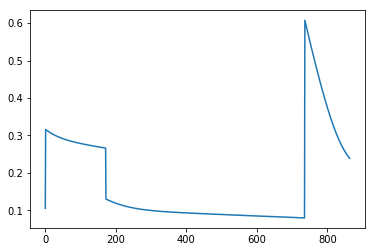

In [6]:
plt.plot(sing_val_log)

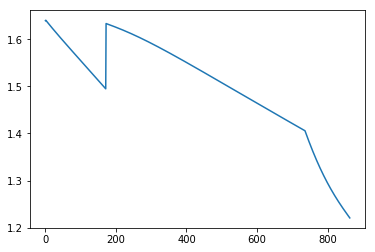

In [7]:
plt.plot(distances_log)

TODO:

* use projected gradient descent